<a href="https://colab.research.google.com/github/Aya22Bedair/nti/blob/main/Copy_of_de_noising_with_skimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras import backend

from skimage.util import random_noise
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_squared_error

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train_noise=noise_img = random_noise(x_train, mode='s&p', amount=0.3)
x_test_noise=noise_img = random_noise(x_test, mode='s&p', amount=0.3)

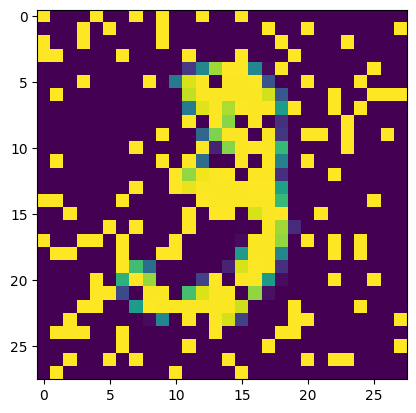

In [ ]:
plt.imshow(x_train_noise[10])

In [ ]:
x_train = x_train.reshape(-1,28*28)/255
x_test = x_test.reshape(-1,28*28)/255

x_train_noise=x_train_noise.reshape(-1,28*28)/255
x_test_noise=x_test_noise.reshape(-1,28*28)/255
     

In [ ]:
config = tf.compat.v1.ConfigProto(device_count={'GPU':1})
sess = tf.compat.v1.Session(config=config)
backend.set_session(sess)

In [ ]:
model = Sequential()
model.add(Dense(784,input_dim=784,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(128,input_dim=784,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(784,activation='sigmoid'))



In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
res = model.fit(x_train_noise,x_train, batch_size=256, epochs=50,verbose=1, validation_data=[x_test_noise,x_test])

Epoch 1/50
235/235 [==============================] - 9s 7ms/step - loss: 0.3004 - val_loss: 0.2546
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2454 - val_loss: 0.2336
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2299 - val_loss: 0.2246
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2138 - val_loss: 0.2010
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1939 - val_loss: 0.1875
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1826 - val_loss: 0.1788
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1741 - val_loss: 0.1706
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1686 - val_loss: 0.1672
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1646 - val_loss: 0.1633
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1602 - val_loss: 0.1578

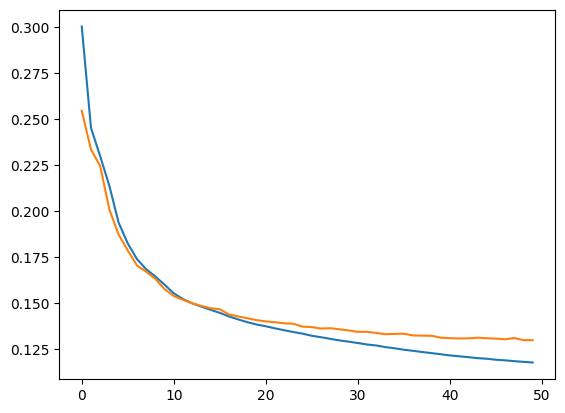

In [ ]:
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])

In [ ]:
pred=model.predict(x_test_noise)

313/313 [==============================] - 1s 2ms/step


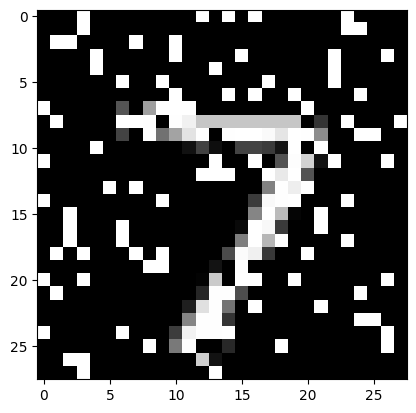

In [ ]:
plt.imshow(x_test_noise[0].reshape(28,28), cmap='gray')

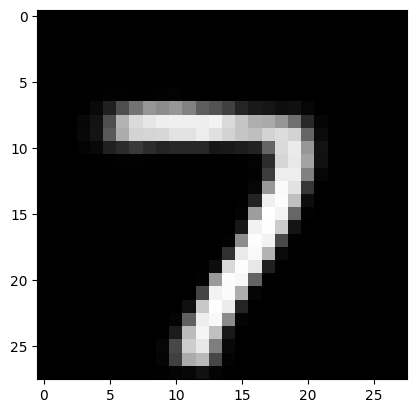

In [ ]:
plt.imshow(pred[0].reshape(28,28), cmap='gray')